# Overview

Demonstrate building a linear regression model to predict salary based on years of experience. 

We will be using the Salary dataset obtained from Kaggle: https://www.kaggle.com/sudhirnl7/linear-regression-tutorial/data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("data/Salary.csv")

## Understanding the Data

Below we can see two numeric variables:

- **YearsExpierence**: Number of years working (Continuous)
- **Salary**: Salary amount (Continuous)

In [23]:
df.head()

,years,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [13]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


Lets quickly change the column names to **years** and **salary** for convenience 

In [14]:
new_cols = {"YearsExperience":"years", "Salary":"salary"}
df.rename(columns=new_cols, inplace=True)
df.columns.values

array(['years', 'salary'], dtype=object)

## Visualize Data using Seaborn

Next step is to visualize the relationship amoung explanatory variable *years* against response variable *salary* 

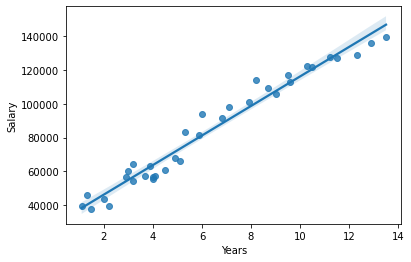

In [25]:
ax = sns.regplot(x="years", y="salary", data=df, fit_reg=True)
ax.set(xlabel="Years", ylabel="Salary")
plt.show()

Viewing above, we can see a positive correlation amount salary and the number of years working. It also appears there is a strong correlation provided regression line. Let's verify this by computing a correlation matrix. 

In [22]:
df.corr(method='pearson')

,years,salary
years,1.000000,0.982427
salary,0.982427,1.000000


As expected, strong correlation score of 0.9824. Which is great news for your Linear Regression model!

## Model Building using Linear Regression

Next up, lets build our Linear Regression model using sklearn. First step is to split up the data into training and test sets

In [47]:
# Declare X and y
X = df["years"].values.reshape(-1,1)
y = df["salary"].values

In [48]:
# Create training and test sets where 30% is used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(y_test)

[116969  57081 109431  98273  67938 121872  93940  56957  64445  66029
  57189]


Afterward, create linear regression regressor and fit it to the training set

In [49]:
# Create regressor
reg = LinearRegression()

# Fit the regressor on training data
reg.fit(X_train, y_train)

LinearRegression()

Now, we are ready to predict! We can see the predicted y values given our X_test data

In [63]:
y_pred = reg.predict(X_test)
y_pred

array([110877.79583392,  64678.96421127, 104033.52448241,  90344.98177941,
        71523.23556278, 119433.1350233 ,  80934.10867109,  63823.43029234,
        56979.15894083,  73234.30340065,  61256.82853552])

Lets compare y_test and y_pred side-by-side

In [72]:
# Create new dataframe 
d = {"y_test":y_test, "y_pred":y_pred}
df_result = pd.DataFrame(data=d)

df_result.head()

,y_test,y_pred
0,116969,110877.795834
1,57081,64678.964211
2,109431,104033.524482
3,98273,90344.981779
4,67938,71523.235563


Finally, we can evaluate the performance of linear regression by computing the $R^2$ score

In [73]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.9171426108885095

Nice, computed a very high score! This means there is a low variance among our predictions - the model fits our data.